# Beleg 1: Bilddateien, Bilddarstellung und Bilddiskretisierung

**Name:**
Theofanis Gkioles Blatsoukas
**Matrikelnr.:**

## Bearbeitungszeitraum
**Bearbeitungsbeginn:** Mo, 17.04.2023
<br>
**Abgabe (in der Übung zu zeigen bis spätestens):** Mo, 05.06.2023


**Hinweise zum Beleg:** 
- Die erfolgreiche Bearbeitung des Belegs ist zwingende Voraussetzung zur Teilnahme an der Klausur. 
- Sofern nicht anders angegeben können die Operationen mit einer Library Ihrer Wahl durchgeführt werden.


### Viel Erfolg!

### Aufgabe 1: Grauwertbilder

In der ersten Aufgabe werden die wesentlichen Grundlagen von Bildern behandelt. Zunächst wird ein CT Bild im PNG Format eingelesen (`ct_image.png`) und die Bildmatrix untersucht. 

**Aufgabe 1.1**: Lesen Sie das Bild ein und visualisieren/plotten Sie es mit `pyplot` aus der `matplotlib` Library.

In [1]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

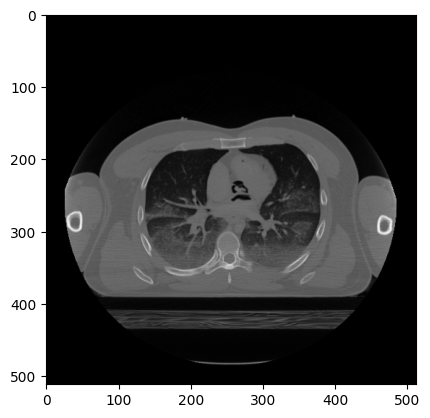

In [2]:

img = Image.open('C:/Users/fanis/Downloads/bild bearbeitung/Beleg 1/ct_image.png')

# Lesen
plt.imshow(img, cmap= 'gray')

# Plotten
plt.show()


**Aufgabe 1.2**: Geben Sie die Dimensionen des Bildes (Breite und Höhe) in Pixel sowie den jeweils kleinsten und größten Wert im Bild aus.  

In [3]:
# Breite und Höhe des Bildes abrufen
width, height = img.size
print("Breite des Bildes:", width, "Pixel")
print("Höhe des Bildes:", height, "Pixel")

# Kleinsten und größten Wert im Bild abrufen
img_arr = np.array(img)
min_val, max_val = np.min(img_arr), np.max(img_arr)
print("Kleinster Wert im Bild:", min_val)
print("Größter Wert im Bild:", max_val)

Breite des Bildes: 512 Pixel
Höhe des Bildes: 512 Pixel
Kleinster Wert im Bild: 0
Größter Wert im Bild: 255


**Aufgabe 1.3**: Als nächstes soll das Bild in ein Grauwertbild transformiert werden (es hat zwar nur graue Farbtöne, liegt jedoch als RGB Bild vor und hat daher 3 Farbkanäle). Plotten Sie es erneut mit `pyplot` und achten Sie darauf, dass das Bild auch tatsächlich wie ein Grauwertbild aussieht.

In [4]:
import matplotlib.colors as colors

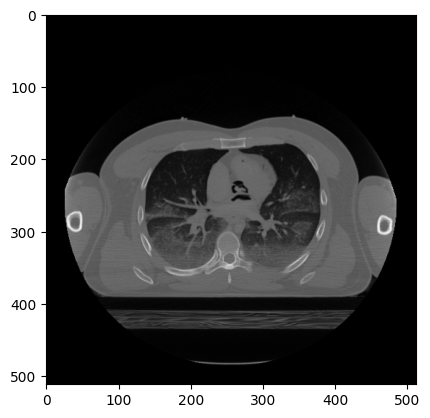

In [5]:

plt.imshow(img, cmap='gray')

**Aufgabe 1.4**: Als nächstes soll im CT Bild der schwarze Rand abgeschnitten werden, da dort keine Informationen über die aufgenommenen Strukturen zu finden sind. Zu diesem Zweck sollen Sie eine Bounding Box um den relevanten Bereich bestimmen. Dabei handelt es sich um ein Rechteck, dass sich über alle Bildbereiche erstreckt, in denen Inhalte zu finden sind (sie also nicht schwarz bzw. enthalten nicht den Wert 0). Nutzen Sie nun die gefundene Bounding Box, um das Bild entsprechend zuzuschneiden (oder auch zu "croppen").

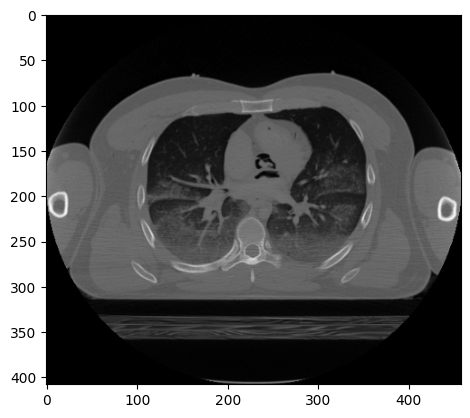

In [6]:
# Convert image to NumPy array
img_arr = np.array(img)

# Find bounding box
nonzero_rows, nonzero_cols = np.nonzero(img_arr)
min_row, max_row = np.min(nonzero_rows), np.max(nonzero_rows)
min_col, max_col = np.min(nonzero_cols), np.max(nonzero_cols)

# Crop image using bounding box
img_cropped = img.crop((min_col, min_row, max_col, max_row))

# Display cropped image
plt.imshow(img_cropped, cmap='gray')
plt.show()

**Aufgabe 1.5**: Rotieren Sie das zugeschnittene Bild sowohl um 45° als auch um 90° und plotten Sie die rotierten Bilder.

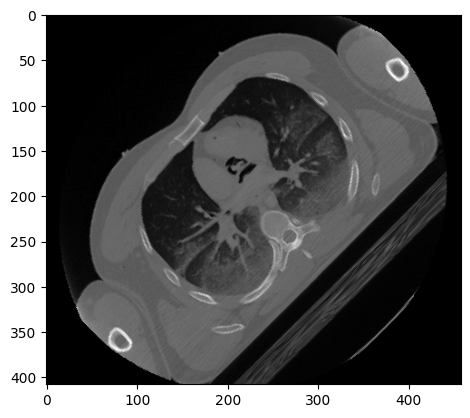

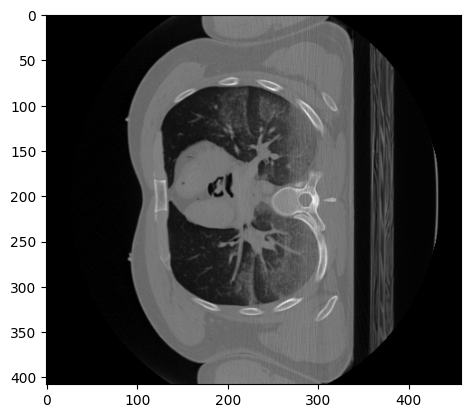

In [7]:
# Rotate image by 45 degrees
img_rotated_45 = img_cropped.rotate(45)

# Display rotated image
plt.imshow(img_rotated_45, cmap='gray')
plt.show()

# Rotate image by 90 degrees
img_rotated_90 = img_cropped.rotate(90)

# Display rotated image
plt.imshow(img_rotated_90, cmap='gray')
plt.show()


### Aufgabe 2: Farbbilder

In dieser Aufgabe werden Sie mit einem Farbbild (`mamma_tissue.png`) arbeiten. Dabei handelt es sich um eine Gewebeaufnahme einer Biopsie mit invasivem duktalem Mammakarzinom. 

**Aufgabe 2.1**: Lesen Sie das Bild sowohl mit OpenCV als auch mit Scikit-Image ein und visualisieren/plotten Sie es. Achten Sie dabei auf eine korrekte Darstellung des Bildes (zum Vergleich können Sie das Bild in einem Bildbetrachtungsprogramm Ihrer Wahl öffnen). 

In [8]:
import cv2
from skimage import io

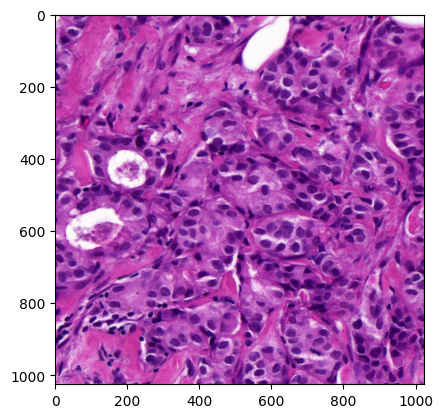

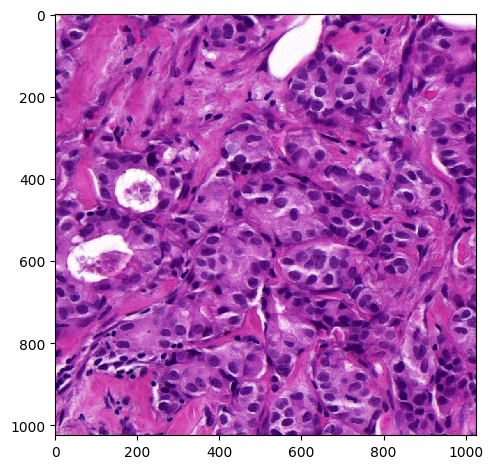

In [9]:
# Read image using OpenCV
img_cv2 = cv2.imread('C:/Users/fanis/Downloads/bild bearbeitung/Beleg 1/mamma_tissue.png')

#cv2.imshow("cv2",img_cv2)
im_rgb = cv2.cvtColor(img_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(im_rgb)
plt.show()

# Read image using scikit-image
img_skimage = io.imread('C:/Users/fanis/Downloads/bild bearbeitung/Beleg 1/mamma_tissue.png')

io.imshow(img_skimage)
io.show()


**Aufgabe 2.2**: Zerlegen Sie das Bild in seine einzelnen Farbkanäle für Rot, Grün und Blau. Zeigen Sie in einer gemeinsamen Grafik sowohl das Farbbild, als auch die drei einzelnen Farbkanäle.

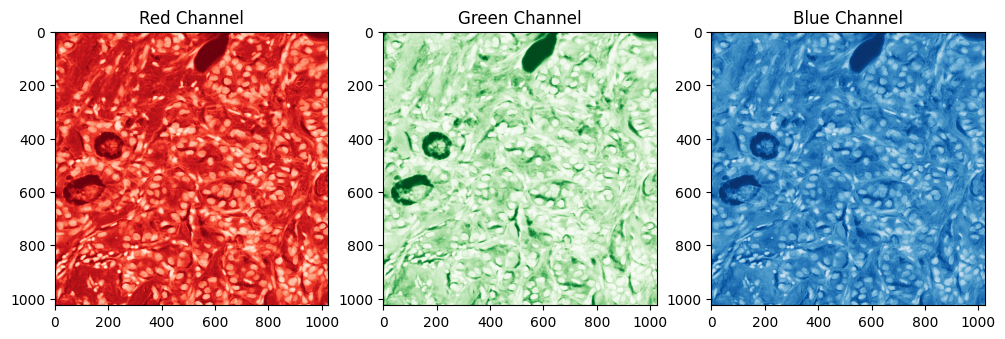

In [10]:
# Split the image into its color channels
red_channel = im_rgb[:,:,0]
green_channel = im_rgb[:,:,1]
blue_channel = im_rgb[:,:,2]

# Plot the original image and the color channels
fig, (ax2, ax3, ax4) = plt.subplots(1, 3, figsize=(12, 4))

ax2.imshow(red_channel, cmap='Reds')
ax2.set_title('Red Channel')
ax3.imshow(green_channel, cmap='Greens')
ax3.set_title('Green Channel')
ax4.imshow(blue_channel, cmap='Blues')
ax4.set_title('Blue Channel')
plt.show()

**Aufgabe 2.3**: Führen Sie eine Farbquantisierung (also eine Reduktion der im Bild vorkommenden Farben) auf dem Bild durch. Plotten Sie das Ergebnis mit 2, 4, 8 und 16 Farben. Sie können hierzu einen der in der Vorlesung vorgestellten Algorithmen (Median Cut und Fehlerdiffusion) verwenden. Die Abgabe wird aber auch abgenommen, wenn die Reduktion mithilfe einer der gängigen Bildverarbeitungs-Librarys durchgeführt wird.

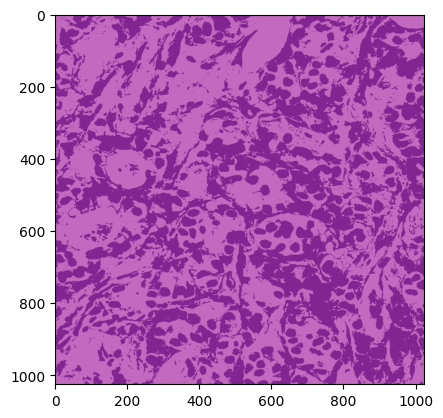

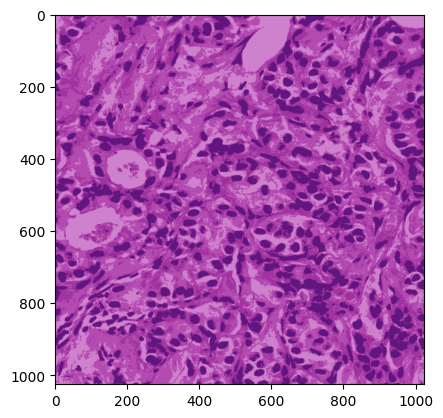

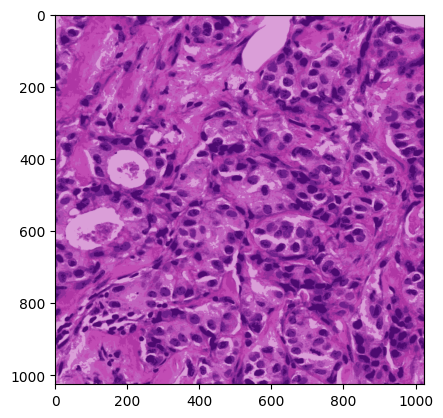

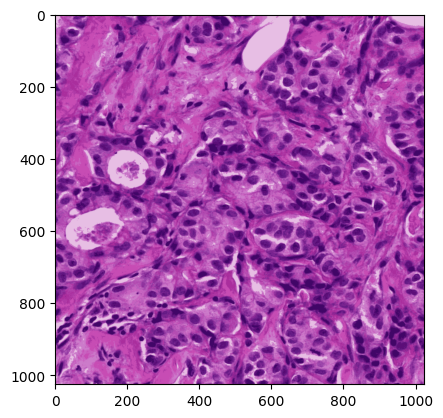

In [11]:
import PIL

im1 = Image.open('C:/Users/fanis/Downloads/bild bearbeitung/Beleg 1/mamma_tissue.png') 

im2 = im1.quantize(2)
im4 = im1.quantize(4)
im8 = im1.quantize(8)
im16 = im1.quantize(16)

plt.imshow(im2)
plt.show()
plt.imshow(im4)
plt.show()
plt.imshow(im8)
plt.show()
plt.imshow(im16)
plt.show()

**Aufgabe 2.4**: Lesen Sie die Größe des Originalbildes ein und geben sie mit einer `print`-Anweisung aus. Anschließend verkleinern Sie das Bild auf 128x128 Pixel und plotten es. Schließlich skalieren Sie das verkleinerte Bild wieder auf die Originalgröße und plotten es erneut.

Original size: (1025, 1025)


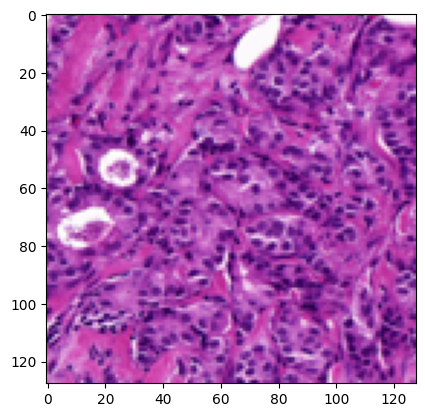

In [21]:


# Load the original image and get its size
im_rgb = Image.open('C:/Users/fanis/Downloads/bild bearbeitung/Beleg 1/mamma_tissue.png')
original_size = im_rgb.size
print(f"Original size: {original_size}")

# Resize the image to 128x128 pixels
im_resized = im_rgb.resize((128, 128))
plt.imshow(im_resized)
plt.show()

# Plot the resized image
im_resized.show(title='Resized to 128x128 pixels')

# Scale the resized image back to its original size
im_scaled = im_resized.resize(original_size)

# Plot the scaled image
im_scaled.show(title='Scaled back to original size')

**Aufgabe 2.5**: Lesen die das Bild ein und konvertieren Sie es in den HSV Raum. Setzen Sie mit hilfe des HSV Farbmodells alle Pixel auf 0, die nicht Teil eines Zellkerns sind. Beschreiben Sie dabei in einem kurzen Fließtext, was Sie sich bei Ihrer Vorgehensweise gedacht haben. 

*Hinweis: Für die Abnhame dieser Teilaufgabe wird kein perfektes Ergebnis erwartet. Viel eher sollen Sie zeigen, dass Sie das Grundprinzip des HSV Farbmodells verstanden und auf die gegebene Problemstellung anwenden können.*

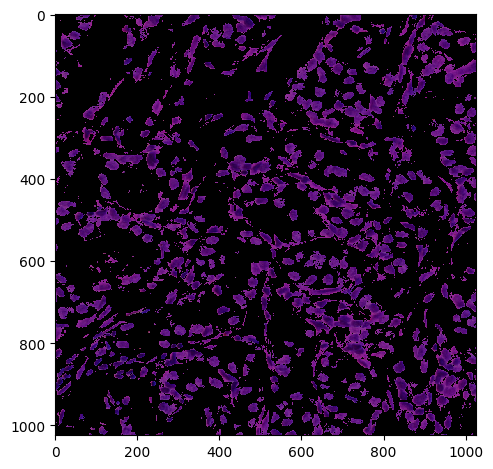

In [31]:
from skimage import io, color

# Load the image and convert it to HSV space
im_rgb = io.imread('C:/Users/fanis/Downloads/bild bearbeitung/Beleg 1/mamma_tissue.png')
im_hsv = color.rgb2hsv(im_rgb)

# Set to 0 all pixels where the brightness is low
im_hsv[:, :, 2] = np.where(im_hsv[:, :, 2] > 0.6, 0, im_hsv[:, :, 2])

# Convert back to RGB color space and display the result
im_rgb = color.hsv2rgb(im_hsv)
io.imshow(im_rgb)
io.show()
